In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [3]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


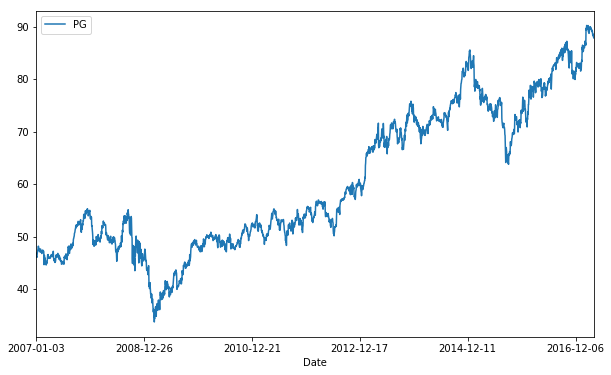

In [5]:
data.plot(figsize=(10, 6));

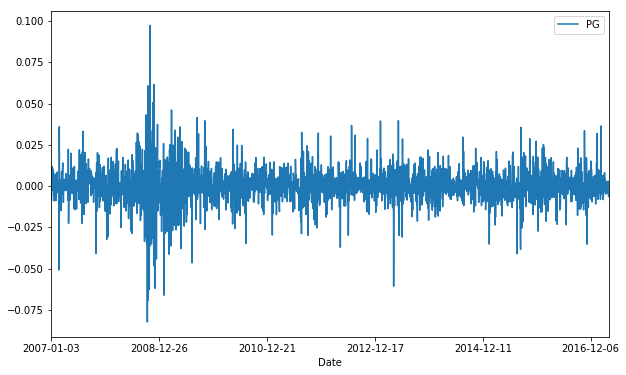

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([ 0.00018236])

In [15]:
drift.values

array([ 0.00018236])

In [16]:
stdev.values

array([ 0.0111381])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[ 0.30077366,  0.47515502],
       [ 0.76609102,  0.96070569],
       [ 0.3463224 ,  0.64024469],
       [ 0.45816157,  0.44326918],
       [ 0.04667204,  0.73729661],
       [ 0.20528962,  0.56849063],
       [ 0.80276568,  0.38322597],
       [ 0.51065487,  0.44396485],
       [ 0.02758349,  0.63210819],
       [ 0.51568951,  0.1359793 ]])

In [19]:
norm.ppf(x)

array([[-0.52217668, -0.06231745],
       [ 0.72603395,  1.75893454],
       [-0.39526841,  0.35911293],
       [-0.10506638, -0.14268577],
       [-1.67801544,  0.63503319],
       [-0.82287474,  0.17253272],
       [ 0.85154145, -0.29701909],
       [ 0.02671097, -0.14092436],
       [-1.91755878,  0.33744214],
       [ 0.03933792, -1.0985633 ]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.68755352, -1.65545464],
       [ 0.70805672,  0.39254567],
       [-1.0280268 , -0.01480438],
       [-0.86881169,  1.51443469],
       [-0.24745195,  0.37447133],
       [-0.11735091, -1.46294722],
       [-1.37965092, -2.29854145],
       [ 1.08632016, -1.70421443],
       [ 0.00339009,  0.67238241],
       [-0.17001384, -0.36904279]])

In [21]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[ 1.00541907,  0.99536115,  1.01243202, ...,  0.99800148,
         0.98300243,  0.98917361],
       [ 0.99158162,  0.99794593,  0.98256085, ...,  1.01546353,
         0.98931363,  0.98577391],
       [ 1.00844672,  0.99659112,  0.99064941, ...,  1.00325338,
         1.00227502,  1.00993224],
       ..., 
       [ 0.98948229,  0.97515951,  0.98378484, ...,  1.00808079,
         1.01688749,  1.02015356],
       [ 1.01131633,  0.98085962,  0.99361873, ...,  1.00200418,
         1.02050348,  0.99882288],
       [ 1.00449614,  0.9909857 ,  0.97614622, ...,  0.98467619,
         1.01171965,  0.99147813]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [23]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [27]:
price_list[0] = S0
price_list

array([[ 88.118629,  88.118629,  88.118629, ...,  88.118629,  88.118629,
         88.118629],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [29]:
price_list

array([[  88.118629  ,   88.118629  ,   88.118629  , ...,   88.118629  ,
          88.118629  ,   88.118629  ],
       [  87.37681252,   87.93762751,   86.58191462, ...,   89.48125384,
          87.17696036,   86.86504536],
       [  88.11486008,   87.63785886,   85.7723227 , ...,   89.77237022,
          87.37528986,   87.72780959],
       ..., 
       [ 157.16590615,   84.05306421,  130.05059564, ...,   89.50018414,
          95.75073376,   77.92521346],
       [ 158.94444707,   82.44425625,  129.22070815, ...,   89.6795587 ,
          97.71395729,   77.83348615],
       [ 159.65908431,   81.70107863,  126.13830526, ...,   88.30532635,
          98.85913075,   77.17019891]])

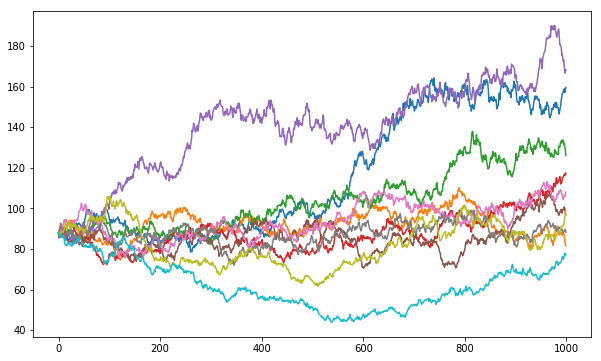

In [31]:
plt.figure(figsize=(10,6))
plt.plot(price_list);